In [1]:
from matplotlib.ticker import FormatStrFormatter as fsf
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, negative_log, load_style_sheet
# from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, load_style_sheet
import numpy as np
import math as m
import vice
import sys
import os
sys.path.append("..")
from src.utils import mu, get_velocity_profile, boxcarsmoothtrend, oh_to_12pluslog
load_style_sheet("papers")
print(sys.version_info)

/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=12, micro=0, releaselevel='final', serial=0)


In [2]:
def plot_profile(ax, output, lookback, zone_width = 0.1, **kwargs):
    radii = [zone_width * (i + 0.5) for i in range(len(output.zones.keys()))]
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    oh = [output.zones["zone%d" % (i)].history["[o/h]"][idx] for i in range(len(output.zones.keys()))]
    oh = oh_to_12pluslog(oh)
    ax.plot(radii, oh, **kwargs)

In [3]:
outputs_pristine = [
    "../outputs/constant/vgas-0",
    "../outputs/constant/vgas-0p5",
    "../outputs/constant/vgas-1",
    "../outputs/potential_well_deepening/gamma0p1",
    "../outputs/potential_well_deepening/gamma0p2",
    "../outputs/potential_well_deepening/gamma0p3",
    "../outputs/amd/betaphiin0p8",
    "../outputs/amd/betaphiin0p7",
    "../outputs/amd/betaphiin0p6"
]
outputs_zin = ["%s-xhcgm-0p7" % (name) for name in outputs_pristine]
outputs_pristine = [vice.output(name) for name in outputs_pristine]
outputs_zin = [vice.output(name) for name in outputs_zin]

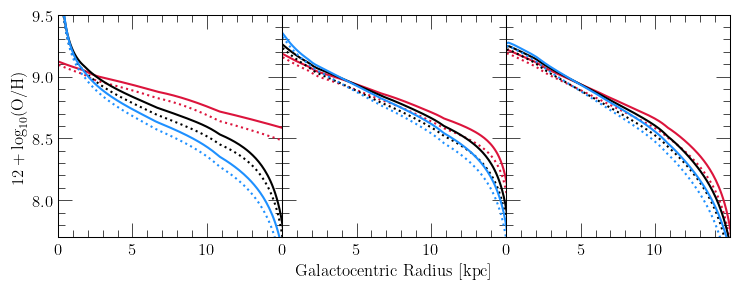

In [4]:
COLORS = ["crimson", "black", "dodgerblue"]
LABELS = [
    r"$v_{r,g} = 0$",
    r"$v_{r,g} = -0.5$ km/s",
    r"$v_{r,g} = -1$ km/s",
    r"$\gamma = 0.1$",
    r"$\gamma = 0.2$",
    r"$\gamma = 0.3$",
    r"$\beta_{\phi,\text{in}} = 0.8$",
    r"$\beta_{\phi,\text{in}} = 0.7$",
    r"$\beta_{\phi,\text{in}} = 0.6$"
]

fig = plt.figure(figsize = (7.5, 3))
axes = []
for i in range(3):
    kwargs = {}
    if i:
        kwargs["sharex"] = axes[0]
        kwargs["sharey"] = axes[0]
    else: pass
    axes.append(fig.add_subplot(131 + i, **kwargs))
    if i:
        plt.setp(axes[i].get_yticklabels(), visible = False)
    else: pass
axes[0].set_ylabel(r"$12 + \log_{10}$(O/H)")
axes[1].set_xlabel(r"Galactocentric Radius [kpc]")
axes[0].set_xlim([0, 15])
axes[0].set_xticks([0, 5, 10])
axes[0].set_ylim([7.7, 9.5])

for i in range(len(outputs_pristine)):
    kwargs = {
        "c": COLORS[i % len(COLORS)],
        "label": LABELS[i]
    }
    plot_profile(axes[int(i / len(COLORS))], outputs_zin[i], 0, **kwargs)
    kwargs["linestyle"] = ":"
    plot_profile(axes[int(i / len(COLORS))], outputs_pristine[i], 0, **kwargs)

plt.tight_layout()
plt.subplots_adjust(wspace = 0)
plt.show()

In [64]:
outputs_pristine = [
    "../outputs/potential_well_deepening/gamma0p2",
    "../outputs/amd/betaphiin0p7",
    # "../outputs/constant/vgas-0p5"
    "../outputs/river/insideout"
]
outputs_zin = ["%s-xhcgm-0p7" % (name) for name in outputs_pristine]
outputs_pristine = [vice.output(name) for name in outputs_pristine]
outputs_zin = [vice.output(name) for name in outputs_zin]

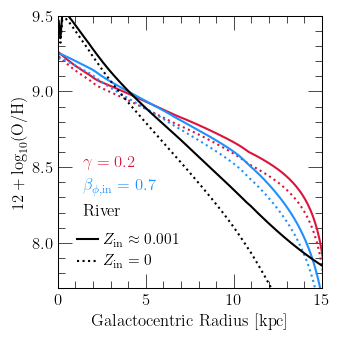

In [66]:
# COLORS = ["black", "crimson", "dodgerblue", "lime"]
COLORS = ["crimson", "dodgerblue", "black"]
# COLORS = ["black"]
# COLORS = ["crimson", "dodgerblue"]
LABELS = [
    r"$\gamma = 0.2$",
    r"$\beta_{\phi,\text{in}} = 0.7$",
    # r"$v_{r,g} = -0.5$ km/s"
    r"River"
]

fig = plt.figure(figsize = (3.5, 3.5))
ax = fig.add_subplot(111)
ax.set_ylabel(r"$12 + \log_{10}$(O/H)")
ax.set_xlabel(r"Galactocentric Radius [kpc]")
ax.set_xlim([0, 15])
ax.set_xticks([0, 5, 10, 15])
ax.set_ylim([7.7, 9.5])
ax.set_yticks([8, 8.5, 9, 9.5])

kwargs = {
    "c": named_colors()["black"],
    "linestyle": "-",
    "label": r"$Z_\text{in} \approx 0.001$"
    # "label": r"$12 + \log_{10}$(O/H)$_\text{CGM} \rightarrow 8.0$"
}
line1 = ax.plot([1, 2], [1, 2], **kwargs)[0]
kwargs["linestyle"] = ":"
# kwargs["label"] = r"$12 + \log_{10}$(O/H)$_\text{CGM} = -\infty$"
kwargs["label"] = r"$Z_\text{in} = 0$"
line2 = ax.plot([1, 2], [1, 2], **kwargs)[0]
kwargs = {
    "loc": mpl_loc("lower left"),
    "bbox_to_anchor": (0.02, 0.02),
    "handlelength": 1.4,
    "fontsize": 11
}
leg = ax.legend(**kwargs)
ax.add_artist(leg)
line1.remove()
line2.remove()

for i in range(len(outputs_pristine)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "label": LABELS[i]
    }
    plot_profile(ax, outputs_zin[i], 0, **kwargs)
    kwargs["label"] = None
    kwargs["linestyle"] = ":"
    plot_profile(ax, outputs_pristine[i], 0, **kwargs)

kwargs = {
    "loc": mpl_loc("lower left"),
    "bbox_to_anchor": (0.02, 0.20),
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, COLORS)

plt.tight_layout()
plt.show()